# 0.0 Imports and Help Functions

In [2]:
# Imports
import pandas as pd
import numpy as np

# Demographics
import geopandas as gpd
from geopy.geocoders import Nominatim
import brazilcep

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.core.display import HTML
from IPython.display import Image

# Web scraping
import requests
from bs4 import BeautifulSoup

geolocator = Nominatim(user_agent="my_geocoder_app")

In [3]:
# Set the option to display all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [4]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings()

# 1. Loading Data

## 1.0 Loading and check data dimensions

In [5]:
dados_rt = pd.read_csv('pr.csv', dtype=object)
dados_rt.head()

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AR_SMRD,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_CIDINI2,AR_DTINI2,AR_CIDINI3,AR_DTINI3,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_CIDTR3,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_INIAR3,AR_FIMAR1,AR_FIMAR2,AR_FIMAR3,AR_NUMC2,AR_NUMC3,AP_NATJUR
0,200801,EP,410000,0013633,4108207914239,200801,0304010073,2304.92,410400,07,60,I,07088017000191,NaN,{{{}~,4,67,F,01,411950,010,83006000,0,1,20080102,20080331,04,1,18,0,0,0,1,0,20080125,E410000002,NaN,0000000000000,0000000,20080102,NaN,0000,C539,0000,NaN,NaN,C539,3,3,3,20070914,N,NaN,NaN,NaN,NaN,NaN,NaN,N,20080102,1,C539,NaN,NaN,120,20080102,NaN,NaN,20080331,NaN,NaN,0,NaN,NaN
1,200801,EP,410000,0013633,4108207874991,200801,0304010090,1101.72,410400,07,60,I,07088017000191,NaN,|}{~{|{{{,4,64,F,01,410690,010,81020140,0,1,20080102,20080331,04,1,21,0,0,1,0,0,NaN,E410000002,NaN,0000000000000,0000000,20080102,NaN,0000,C349,0000,NaN,NaN,C349,N,3,3,20070216,N,NaN,NaN,NaN,NaN,NaN,NaN,N,20080102,5,C349,NaN,NaN,090,20080102,NaN,NaN,20080331,NaN,NaN,0,NaN,NaN
2,200801,EP,410000,0013633,4108207875156,200801,0304010090,993.88,410400,07,60,I,07088017000191,NaN,|}}~~{{{{,4,66,M,01,410310,010,83450000,0,1,20080102,20080331,04,1,21,0,0,1,0,0,NaN,E410000002,NaN,0000000000000,0000000,20080102,NaN,0000,C029,0000,NaN,NaN,C029,S,3,3,20071112,N,NaN,NaN,NaN,NaN,NaN,NaN,N,20080102,5,C029,NaN,NaN,105,20080102,NaN,NaN,20080331,NaN,NaN,0,NaN,NaN
3,200801,EP,410000,2740338,4108204232011,200801,0304010286,1167.72,410480,07,61,I,81270548000153,NaN,{{|{}{,4,49,M,99,410480,010,85811150,0,1,20080101,20080331,04,1,21,0,0,1,0,0,NaN,E410000010,01,0000000000000,2740338,20080101,20080101,0000,C168,0000,NaN,NaN,C168,N,3,GX,20070827,N,NaN,NaN,NaN,NaN,NaN,NaN,N,20080101,2,C168,NaN,NaN,060,20071016,NaN,NaN,20071231,NaN,NaN,0,NaN,NaN
4,200801,EP,410000,2740338,4108204232792,200801,0304010286,1167.72,410480,07,61,I,81270548000153,NaN,{{|{|~,4,57,M,99,411460,010,85960000,0,1,20080101,20080331,04,1,21,0,0,1,0,0,NaN,E410000010,01,0000000000000,2740338,20080101,20080101,0000,C168,0000,NaN,NaN,C168,S,3,GX,20070723,N,NaN,NaN,NaN,NaN,NaN,NaN,N,20080101,2,C168,NaN,NaN,060,20071024,NaN,NaN,20071231,NaN,NaN,0,NaN,NaN


In [6]:
print(f'Number of Rows: {dados_rt.shape[0]}')
print(f'Number of Columns: {dados_rt.shape[1]}')

Number of Rows: 326567
Number of Columns: 74


## 1.1 Renaming columns

In [7]:
dados_pr_rt1 = dados_rt.copy()

In [8]:
# First we drop the column AP_SMRD
dados_pr_rt1 = dados_pr_rt1.drop(columns=['AR_SMRD'])

In [9]:
# renaming columns
dict_rename = {
    'AP_MVM': 'data_processamento',
    'AP_CONDIC': 'sigla_tipo_gestao',
    'AP_GESTAO': 'codigo_uf_municipio_gestao',
    'AP_CODUNI': 'codigo_cnes',
    'AP_AUTORIZ': 'numero_apac_autorizacao',
    'AP_CMP': 'data_atendimento_competencia',
    'AP_PRIPAL': 'procedimento_principal_apac',
    'AP_VL_AP': 'valor_total_apac_aprovado',
    'AP_UFMUN': 'codigo_uf_municipio_estabelecimento',
    'AP_TPUPS': 'tipo_estabelecimento',
    'AP_TIPPRE': 'tipo_prestador',
    'AP_MN_IND': 'estabelecimento_mantido_individual',
    'AP_CNPJCPF': 'cnpj_estabelecimento_executante',
    'AP_CNPJMNT': 'cnpj_mantenedora',
    'AP_CNSPCN': 'numero_cns_paciente',
    'AP_COIDADE': 'codigo_idade_paciente',
    'AP_NUIDADE': 'idade_paciente',
    'AP_SEXO': 'sexo_paciente',
    'AP_RACACOR': 'raca_cor_paciente',
    'AP_MUNPCN': 'codigo_uf_municipio_residencia_paciente',
    'AP_UFNACIO': 'nacionalidade_paciente',
    'AP_CEPPCN': 'cep_paciente',
    'AP_UFDIF': 'uf_residencia_diferente_uf_estabelecimento',
    'AP_MNDIF': 'municipio_residencia_diferente_municipio_estabelecimento',
    'AP_DTINIC': 'data_inicio_validade',
    'AP_DTFIM': 'data_fim_validade',
    'AP_TPATEN': 'tipo_atendimento_apac',
    'AP_TPAPAC': 'tipo_apac',
    'AP_MOTSAI': 'motivo_saida_permanencia',
    'AP_OBITO': 'indicador_obito',
    'AP_ENCERR': 'indicador_encerramento',
    'AP_PERMAN': 'indicador_permanencia',
    'AP_ALTA': 'indicador_alta',
    'AP_TRANSF': 'indicador_transferencia',
    'AP_DTOCOR': 'data_ocorrencia',
    'AP_CODEMI': 'codigo_orgao_emissor',
    'AP_CATEND': 'carater_atendimento',
    'AP_APACANT': 'numero_apac_anterior',
    'AP_UNISOL': 'codigo_cnes_estabelecimento_solicitante',
    'AP_DTSOLIC': 'data_solicitacao',
    'AP_DTAUT': 'data_autorizacao',
    'AP_CIDCAS': 'cid_causas_associadas',
    'AP_CIDPRI': 'cid_principal',
    'AP_CIDSEC': 'cid_secundario',
    'AP_ETNIA': 'etnia_paciente',
    'AR_SMRD': 'somatoria_multiplos_registros_dados', # Inferred from context, as specific description was missing for AR_SMRD [cite: 145]
    'AR_CID10': 'cid_10_topografia',
    'AR_LINFIN': 'linfonodos_regionais_invadidos',
    'AR_ESTADI': 'estadio_uicc',
    'AR_GRAHIS': 'grau_histopatologico',
    'AR_DTIDEN': 'data_identificacao_patologica',
    'AR_TRANTE': 'tratamentos_anteriores',
    'AR_CIDINI1': 'cid_1_tratamento_anterior',
    'AR_DTINI1': 'data_inicio_1_tratamento_anterior',
    'AR_CIDINI2': 'cid_2_tratamento_anterior',
    'AR_DTINI2': 'data_inicio_2_tratamento_anterior',
    'AR_CIDINI3': 'cid_3_tratamento_anterior',
    'AR_DTINI3': 'data_inicio_3_tratamento_anterior',
    'AR_CONTTR': 'continuidade_tratamento',
    'AR_DTINTR': 'data_inicio_tratamento_solicitado',
    'AR_FINALI': 'finalidade_tratamento',
    'AR_CIDTR1': 'cid_topografico_1',
    'AR_CIDTR2': 'cid_topografico_2',
    'AR_CIDTR3': 'cid_topografico_3',
    'AR_NUMC1': 'numero_campo_insercoes_1',
    'AR_INIAR1': 'data_inicio_1',
    'AR_INIAR2': 'data_inicio_2',
    'AR_INIAR3': 'data_inicio_3',
    'AR_FIMAR1': 'data_fim_1',
    'AR_FIMAR2': 'data_fim_2',
    'AR_FIMAR3': 'data_fim_3',
    'AR_NUMC2': 'numero_campo_insercoes_2',
    'AR_NUMC3': 'numero_campo_insercoes_3',
    'AP_NATJUR': 'codigo_natureza_juridica'
}

dados_pr_rt1 = dados_pr_rt1.rename(columns=dict_rename)

## 1.2 Mapping apac procedures

In [10]:
dados_pr_rt2 = dados_pr_rt1.copy()

In [11]:
# Changing column "procedimento_principal_apac" to object
# dados_sp_rt2["procedimento_principal_apac"] = dados_sp_rt2["procedimento_principal_apac"].astype(str).apply(lambda x: '0' + x[0:9])

In [12]:
# Dictionary with the mapping of APAC procedures
apac_procedures = {'0304010014': 'Betaterapia dérmica', '0304010022': 'Betaterapia oftálmica', '0304010030': 'Betaterapia para profilaxia de pterígio', 
                        '0304010049': 'Braquiterapia', '0304010057': 'Braquiterapia com fios de iridium', '0304010065': 'Braquiterapia com Iodo 125 / Ouro 198', 
                        '0304010073': 'Braquiterapia de alta taxa de dose', '0304010081': 'Verificação por imagem em radioterapia', '0304010090': 'Cobaltoterapia', 
                        '0304010103': 'Implantação de halo para radiocirurgia', '0304010120': 'Irradiação de corpo inteiro pré-transplante de medula óssea', 
                        '0304010138': 'Irradiação de meio corpo', '0304010146': 'Irradiação de pele total', '0304010154': 'Máscara ou imobilização personalizada', 
                        '0304010162': 'Moldagem em colo e/ou corpo do útero', '0304010189': 'Planejamento complexo', '0304010197': 'Planejamento de braquiterapia de alta taxa de dose', 
                        '0304010200': 'Planejamento simples', '0304010219': 'Radiocirurgia', '0304010235': 'Radioterapia de doença ou condição benigna', 
                        '0304010243': 'Radioterapia estereotática fracionada', '0304010260': 'Roentgenterapia', '0304010286': 'Radioterapia com acelerador linear só de fótons', 
                        '0304010294': 'Radioterapia com acelerador linear de fótons e elétrons', '0304010308': 'Colimação personalizada', '0304010316': 'Planejamento para radioterapia conformada tridimensional', 
                        '0304010324': 'Moldagem/Implante em mucosa (por tratamento completo)', '0304010332': 'Moldagem/Implante em pele/mucosa (por tratamento completo)',
                        '0304010367': 'Radioterapia de Cabeça e Pescoço', '0304010367': 'RADIOTERAPIA DE CABEÇA E PESCOÇO', '030401037': 'RADIOTERAPIA DO APARELHO DIGESTIVO', 
                        '0304010367': 'RADIOTERAPIA DE CABEÇA E PESCOÇO', '0304010375': 'RADIOTERAPIA DO APARELHO DIGESTIVO', '0304010383': 'RADIOTERAPIA DE TRAQUEIA, BRÔNQUIO, PULMÃO, PLEURA E MEDIASTINO', 
                        '0304010391': 'RADIOTERAPIA DE OSSOS/CARTILAGENS/PARTES MOLES', '0304010405': 'RADIOTERAPIA DE PELE', '0304010413': 'RADIOTERAPIA DE MAMA', '0304010421': 'RADIOTERAPIA DE CÂNCER GINECOLÓGICO', 
                        '0304010430': 'BRAQUITERAPIA GINECOLÓGICA', '0304010448': 'RADIOTERAPIA DE PÊNIS', '0304010456': 'RADIOTERAPIA DE PRÓSTATA', '0304010464': 'BRAQUITERAPIA DE PRÓSTATA', '0304010472': 'RADIOTERAPIA DO APARELHO URINÁRIO', 
                        '0304010480': 'RADIOTERAPIA DE OLHOS E ANEXOS'}

dados_pr_rt2["procedimento_principal_apac_nome"] = dados_pr_rt2["procedimento_principal_apac"].map(apac_procedures)

## 1.3 Correcting type of data

In [13]:
dados_pr_rt3 = dados_pr_rt2.copy()

In [14]:
# Type -> period
period_list = ['data_processamento', 'data_atendimento_competencia']
for period in period_list:
    dados_pr_rt3[period] = pd.to_datetime(dados_pr_rt3[period], format='%Y%m').astype('period[M]')

In [15]:
# Type -> date
date_list = ['data_inicio_validade', 'data_fim_validade', 'data_solicitacao', 'data_autorizacao', 'data_identificacao_patologica', 
 'data_inicio_1_tratamento_anterior', 'data_inicio_2_tratamento_anterior', 'data_inicio_3_tratamento_anterior', 'data_inicio_tratamento_solicitado',
 'data_inicio_1', 'data_inicio_2', 'data_inicio_3', 'data_fim_1', 'data_fim_2', 'data_fim_3']

for date in date_list:
    dados_pr_rt3[date] = pd.to_datetime(dados_pr_rt3[date], format='%Y%m%d', errors='coerce')

In [16]:
# Type -> float
dados_pr_rt3['valor_total_apac_aprovado'] = dados_pr_rt3['valor_total_apac_aprovado'].astype(float)

## 1.4 Dropping columns and creating column CID10 with just 2 digits

In [17]:
# Dropping columns - remove column 'tipo_prestador' because this info is not used more in datasus
dados_pr_rt4 = dados_pr_rt3.drop(['tipo_prestador', 'numero_apac_autorizacao', 'cnpj_mantenedora', 'numero_cns_paciente', 'cid_causas_associadas', 'numero_campo_insercoes_1', 'numero_campo_insercoes_2', 'numero_campo_insercoes_3'], axis=1).copy()

In [18]:
# Columns CID10
dados_pr_rt4['cid10'] = dados_pr_rt4['cid_principal'].apply(lambda x: x[:3])

## 1.5 Creating column city name

In [19]:
municipios_pr = pd.read_csv('municipios_pr.csv', encoding="latin")

In [20]:
# Excluding last character to match with main data
municipios_pr['cod'] = municipios_pr['codigo'].astype(str).apply(lambda x: x[0:6])

municipios_pr_dict = municipios_pr.set_index('cod')['cidade'].to_dict()

# Creating column city_cnes -> institution's city
dados_pr_rt4['cidade_cnes'] = dados_pr_rt4['codigo_uf_municipio_estabelecimento'].map(municipios_pr_dict)

# Creating column patient_city
dados_pr_rt4['cidade_paciente'] = dados_pr_rt4['codigo_uf_municipio_residencia_paciente'].map(municipios_pr_dict)

# Creating column city_gestao
dados_pr_rt4['cidade_gestao'] = dados_pr_rt4['codigo_uf_municipio_gestao'].map(municipios_pr_dict)
dados_pr_rt4['cidade_gestao'] = np.where(dados_pr_rt4['codigo_uf_municipio_gestao'] == '350000', 'Estadual', dados_pr_rt4['cidade_gestao'])

## 1.6 Extracting lat and long coordinates from each city

In [ ]:
'''# Using api to extract latitude and longitude
lat_long_dict = {}

state_country = ", Paraná, BR"

for city in municipios_pr['cidade']:
    city_name = city
    location = geolocator.geocode(city_name + state_country)
    if location:
        latitude = location.latitude
        longitude = location.longitude
        lat_long_dict[city_name] = (latitude, longitude)        
    else:
        print(f"Could not find coordinates for {city_name}")
        
# Transforming data in dataframe to merge
lat_long_df = pd.DataFrame.from_dict(lat_long_dict, orient='index', columns=['latitude', 'longitude']).reset_index().rename(columns={'index': 'cidade_cnes'})'''

In [ ]:
lat_long_dict = {'Abatiá': (-23.3052967, -50.3102532),
 'Adrianópolis': (-24.6557863, -48.9912769),
 'Agudos do Sul': (-25.9890808, -49.3328175),
 'Almirante Tamandaré': (-25.3133048, -49.2997838),
 'Altamira do Paraná': (-24.798939, -52.7132201),
 'Alto Paraíso': (-23.508137, -53.728537),
 'Alto Paraná': (-23.131247, -52.318893),
 'Alto Piquiri': (-24.0239021, -53.4417448),
 'Altônia': (-23.8722004, -53.894037),
 'Alvorada do Sul': (-22.7807269, -51.2307721),
 'Amaporã': (-23.094272, -52.786597),
 'Ampére': (-25.9168712, -53.4742414),
 'Anahy': (-24.6450861, -53.1337957),
 'Andirá': (-23.0494761, -50.2310027),
 'Ângulo': (-23.1958345, -51.9094976),
 'Antonina': (-25.4298854, -48.7125431),
 'Antônio Olinto': (-25.9849006, -50.1974516),
 'Apucarana': (-23.5525327, -51.4610764),
 'Arapongas': (-23.4152862, -51.4293961),
 'Arapoti': (-24.1457957, -49.8224605),
 'Arapuã': (-24.3079525, -51.7901941),
 'Araruna': (-23.9320308, -52.4976047),
 'Araucária': (-25.5861107, -49.4051209),
 'Ariranha do Ivaí': (-24.3834527, -51.5876772),
 'Assaí': (-23.3736041, -50.8454929),
 'Assis Chateaubriand': (-24.4054826, -53.5120468),
 'Astorga': (-23.2350184, -51.6647074),
 'Atalaia': (-23.1513833, -52.0529697),
 'Balsa Nova': (-25.5842234, -49.6312741),
 'Bandeirantes': (-23.107788, -50.370407),
 'Barbosa Ferraz': (-24.0287182, -52.00811),
 'Barra do Jacaré': (-23.1151788, -50.1813945),
 'Barracão': (-26.2524094, -53.6349764),
 'Bela Vista da Caroba': (-25.8792818, -53.6672545),
 'Bela Vista do Paraíso': (-22.9948493, -51.1907996),
 'Bituruna': (-26.161281, -51.5533319),
 'Boa Esperança': (-24.2411024, -52.7860277),
 'Boa Esperança do Iguaçu': (-25.6362851, -53.2139114),
 'Boa Ventura de São Roque': (-24.88177, -51.5441292),
 'Boa Vista da Aparecida': (-25.4357216, -53.4067721),
 'Bocaiúva do Sul': (-25.206591, -49.114131),
 'Bom Jesus do Sul': (-26.192388, -53.6000736),
 'Bom Sucesso': (-23.7101968, -51.7661597),
 'Bom Sucesso do Sul': (-26.0749256, -52.8348629),
 'Borrazópolis': (-23.9399295, -51.5842203),
 'Braganey': (-24.8179919, -53.118506),
 'Brasilândia do Sul': (-24.1975793, -53.527551),
 'Cafeara': (-22.78905, -51.714195),
 'Cafelândia': (-24.6176963, -53.3218057),
 'Cafezal do Sul': (-23.900508, -53.512418),
 'Califórnia': (-23.6672543, -51.3554556),
 'Cambará': (-23.042273, -50.075281),
 'Cambé': (-23.2782035, -51.2779583),
 'Cambira': (-23.6002773, -51.5809914),
 'Campina da Lagoa': (-24.5937926, -52.8038965),
 'Campina do Simão': (-25.1086375, -51.8076658),
 'Campina Grande do Sul': (-25.3046032, -49.0545355),
 'Campo Bonito': (-25.0328004, -52.992976),
 'Campo do Tenente': (-25.9814143, -49.684518),
 'Campo Largo': (-25.4597726, -49.5270851),
 'Campo Magro': (-25.3691533, -49.4496921),
 'Campo Mourão': (-24.046329, -52.37802),
 'Cândido de Abreu': (-24.5747463, -51.3432207),
 'Candói': (-25.5711951, -52.051107),
 'Cantagalo': (-25.3735238, -52.1238114),
 'Capanema': (-25.6704878, -53.8083036),
 'Capitão Leônidas Marques': (-25.481645, -53.611238),
 'Carambeí': (-24.9513298, -50.1171293),
 'Carlópolis': (-23.4285011, -49.7208814),
 'Cascavel': (-24.9554996, -53.4560544),
 'Castro': (-24.794072, -49.9972914),
 'Catanduvas': (-25.2043528, -53.154826),
 'Centenário do Sul': (-22.821497, -51.5951456),
 'Cerro Azul': (-24.8245108, -49.2615181),
 'Céu Azul': (-25.1484973, -53.8494214),
 'Chopinzinho': (-25.8566167, -52.5294107),
 'Cianorte': (-23.662036, -52.6103989),
 'Cidade Gaúcha': (-23.3816558, -52.9444098),
 'Clevelândia': (-26.404065, -52.3513972),
 'Colombo': (-25.2925439, -49.2243472),
 'Colorado': (-22.8385097, -51.9730135),
 'Congonhinhas': (-23.5497241, -50.5520182),
 'Conselheiro Mairinck': (-23.6229983, -50.1706779),
 'Contenda': (-25.678811, -49.535044),
 'Corbélia': (-24.7951117, -53.2961804),
 'Cornélio Procópio': (-23.1825218, -50.6499263),
 'Coronel Domingos Soares': (-26.22394, -52.0314509),
 'Coronel Vivida': (-25.9803771, -52.5654277),
 'Corumbataí do Sul': (-24.100956, -52.11766),
 'Cruz Machado': (-26.0184626, -51.3503171),
 'Cruzeiro do Iguaçu': (-25.6142278, -53.1299075),
 'Cruzeiro do Oeste': (-23.7839582, -53.0709425),
 'Cruzeiro do Sul': (-22.9623678, -52.1625688),
 'Cruzmaltina': (-23.9930826, -51.4435583),
 'Curitiba': (-25.4295963, -49.2712724),
 'Curiúva': (-24.0383013, -50.455484),
 'Diamante do Norte': (-22.6565442, -52.8589113),
 'Diamante do Sul': (-25.0436147, -52.6800923),
 "Diamante D'Oeste": (-24.9446989, -54.1028594),
 'Dois Vizinhos': (-25.7464681, -53.0554369),
 'Douradina': (-23.3847331, -53.2932989),
 'Doutor Camargo': (-23.5575611, -52.2185546),
 'Doutor Ulysses': (-24.5661713, -49.4203013),
 'Enéas Marques': (-25.9435584, -53.1637539),
 'Engenheiro Beltrão': (-23.7996003, -52.2592684),
 'Entre Rios do Oeste': (-24.7002098, -54.2448233),
 'Esperança Nova': (-23.7246134, -53.8105174),
 'Espigão Alto do Iguaçu': (-25.4223729, -52.8376411),
 'Farol': (-24.0935055, -52.6232183),
 'Faxinal': (-24.001212, -51.3222727),
 'Fazenda Rio Grande': (-25.645841, -49.3126653),
 'Fênix': (-23.9169495, -51.9801443),
 'Fernandes Pinheiro': (-25.4148066, -50.5489837),
 'Figueira': (-23.8481018, -50.4059875),
 'Flor da Serra do Sul': (-26.2589553, -53.308432),
 'Floraí': (-23.3206134, -52.3009856),
 'Floresta': (-23.6144046, -52.0819003),
 'Florestópolis': (-22.8663942, -51.3905121),
 'Flórida': (-23.0861312, -51.9540843),
 'Formosa do Oeste': (-24.2966562, -53.312801),
 'Foz do Iguaçu': (-25.5304023, -54.5830692),
 'Foz do Jordão': (-25.7377144, -52.1209188),
 'Francisco Alves': (-24.0694395, -53.844348),
 'Francisco Beltrão': (-26.0790979, -53.0533527),
 'General Carneiro': (-26.422982, -51.3146691),
 'Godoy Moreira': (-24.1925289, -51.9232662),
 'Goioerê': (-24.1851885, -53.0250623),
 'Goioxim': (-25.1987274, -51.9924229),
 'Grandes Rios': (-24.1454626, -51.5063628),
 'Guaíra': (-24.0851924, -54.2567519),
 'Guairaçá': (-22.9352304, -52.6865101),
 'Guamiranga': (-25.1909033, -50.8116961),
 'Guapirama': (-23.5164582, -50.0431538),
 'Guaporema': (-23.340218, -52.778605),
 'Guaraci': (-22.970394, -51.6479769),
 'Guaraniaçu': (-25.10035, -52.867811),
 'Guarapuava': (-25.3950986, -51.4622016),
 'Guaraqueçaba': (-25.2983566, -48.3290185),
 'Guaratuba': (-25.8806192, -48.5750905),
 'Honório Serpa': (-26.143149, -52.383794),
 'Ibaiti': (-23.8452962, -50.1905666),
 'Ibema': (-25.1192916, -53.0071928),
 'Ibiporã': (-23.2684137, -51.0475907),
 'Icaraíma': (-23.3948345, -53.6162036),
 'Iguaraçu': (-23.1972911, -51.8244524),
 'Iguatu': (-24.7170385, -53.0865561),
 'Imbaú': (-24.447597, -50.7557188),
 'Imbituva': (-25.2293338, -50.6051002),
 'Inácio Martins': (-25.5725435, -51.0764637),
 'Inajá': (-22.7530214, -52.1976067),
 'Indianópolis': (-23.4807249, -52.6987037),
 'Ipiranga': (-25.0239759, -50.5854615),
 'Iporã': (-24.0039474, -53.7100595),
 'Iracema do Oeste': (-24.427888, -53.3539137),
 'Irati': (-25.469663, -50.649287),
 'Iretama': (-24.4205941, -52.1013532),
 'Itaguajé': (-22.618282, -51.967351),
 'Itaipulândia': (-25.1417007, -54.2980691),
 'Itambaracá': (-23.0176678, -50.406887),
 'Itambé': (-23.659424, -51.9903555),
 "Itapejara d'Oeste": (-25.9651274, -52.8149217),
 'Itaperuçu': (-25.2212291, -49.3458394),
 'Itaúna do Sul': (-22.7302304, -52.8854393),
 'Ivaí': (-25.0069795, -50.8568896),
 'Ivaiporã': (-24.2433517, -51.6719268),
 'Ivaté': (-23.4084656, -53.3698352),
 'Ivatuba': (-23.618722, -52.2174491),
 'Jaboti': (-23.7419073, -50.0752639),
 'Jacarezinho': (-23.1590428, -49.9739664),
 'Jaguapitã': (-23.1102516, -51.5327741),
 'Jaguariaíva': (-24.2589699, -49.7201518),
 'Jandaia do Sul': (-23.6003907, -51.645674),
 'Janiópolis': (-24.140124, -52.77836),
 'Japira': (-23.8119773, -50.1397133),
 'Japurá': (-23.469273, -52.55572),
 'Jardim Alegre': (-24.1795192, -51.6927177),
 'Jardim Olinda': (-22.5520625, -52.036373),
 'Jataizinho': (-23.257815, -50.977748),
 'Jesuítas': (-24.3807263, -53.3855699),
 'Joaquim Távora': (-23.4999724, -49.9232545),
 'Jundiaí do Sul': (-23.4369861, -50.2478173),
 'Juranda': (-24.420866, -52.841344),
 'Jussara': (-23.621931, -52.46931),
 'Kaloré': (-23.8242643, -51.6683666),
 'Lapa': (-25.76709, -49.716777),
 'Laranjal': (-24.8909736, -52.4726747),
 'Laranjeiras do Sul': (-25.4073197, -52.4150132),
 'Leópolis': (-23.0789091, -50.7501808),
 'Lidianópolis': (-24.1073464, -51.6525676),
 'Lindoeste': (-25.2608275, -53.5758136),
 'Loanda': (-22.9320944, -53.1352452),
 'Lobato': (-23.0077055, -51.9524309),
 'Londrina': (-23.3112878, -51.1595023),
 'Luiziana': (-24.2838237, -52.2767531),
 'Lunardelli': (-24.0793542, -51.7421822),
 'Lupionópolis': (-22.7558205, -51.6575301),
 'Mallet': (-25.8829457, -50.8289338),
 'Mamborê': (-24.3084433, -52.5298446),
 'Mandaguaçu': (-23.3485076, -52.0966215),
 'Mandaguari': (-23.5224849, -51.6787511),
 'Mandirituba': (-25.7772457, -49.3279107),
 'Manfrinópolis': (-26.1440729, -53.3113372),
 'Mangueirinha': (-25.9412009, -52.1740852),
 'Manoel Ribas': (-24.5177239, -51.6685729),
 'Marechal Cândido Rondon': (-24.5582532, -54.0587821),
 'Maria Helena': (-23.6139395, -53.206135),
 'Marialva': (-23.4820987, -51.795788),
 'Marilândia do Sul': (-23.7462425, -51.3021452),
 'Marilena': (-22.7358333, -53.04),
 'Mariluz': (-24.0031216, -53.148113),
 'Maringá': (-23.425269, -51.9382078),
 'Mariópolis': (-26.3518327, -52.5491563),
 'Maripá': (-24.419978, -53.828641),
 'Marmeleiro': (-26.1472, -53.026741),
 'Marquinho': (-25.1133759, -52.2581854),
 'Marumbi': (-23.7070343, -51.6408276),
 'Matelândia': (-25.2404183, -53.9835004),
 'Matinhos': (-25.8187096, -48.534204),
 'Mato Rico': (-24.7045571, -52.1493001),
 'Mauá da Serra': (-23.9045517, -51.2261166),
 'Medianeira': (-25.2954233, -54.0940666),
 'Mercedes': (-24.4504957, -54.1647255),
 'Mirador': (-23.257015, -52.7756432),
 'Miraselva': (-22.9675823, -51.4847793),
 'Missal': (-25.0913359, -54.2476738),
 'Moreira Sales': (-24.0509413, -53.0101722),
 'Morretes': (-25.4768503, -48.8322501),
 'Munhoz de Melo': (-23.1305703, -51.7276729),
 'Nossa Senhora das Graças': (-22.9138823, -51.7962681),
 'Nova Aliança do Ivaí': (-23.176271, -52.603244),
 'Nova América da Colina': (-23.3315888, -50.7182735),
 'Nova Aurora': (-24.5282336, -53.2576703),
 'Nova Cantu': (-24.6739252, -52.5731265),
 'Nova Esperança': (-23.1818437, -52.1999852),
 'Nova Esperança do Sudoeste': (-25.9004038, -53.2617627),
 'Nova Fátima': (-23.433056, -50.5618055),
 'Nova Laranjeiras': (-25.305376, -52.544682),
 'Nova Londrina': (-22.7633621, -52.9875908),
 'Nova Olímpia': (-23.4699403, -53.090112),
 'Nova Prata do Iguaçu': (-25.6325323, -53.3463611),
 'Nova Santa Bárbara': (-23.5860638, -50.7638011),
 'Nova Santa Rosa': (-24.468132, -53.9547649),
 'Nova Tebas': (-24.437958, -51.945357),
 'Novo Itacolomi': (-23.7635774, -51.5076578),
 'Ortigueira': (-24.2088891, -50.925043),
 'Ourizona': (-23.4047001, -52.1954085),
 'Ouro Verde do Oeste': (-24.7741302, -53.906938),
 'Paiçandu': (-23.4575884, -52.048988),
 'Palmas': (-26.483868, -51.988812),
 'Palmeira': (-25.4269718, -49.9987787),
 'Palmital': (-24.8842985, -52.2113941),
 'Palotina': (-24.2839929, -53.8405463),
 'Paraíso do Norte': (-23.2841185, -52.6024125),
 'Paranacity': (-22.9304971, -52.1523164),
 'Paranaguá': (-25.5148822, -48.5226695),
 'Paranapoema': (-22.6561084, -52.0865163),
 'Paranavaí': (-23.08165, -52.461724),
 'Pato Bragado': (-24.6270545, -54.2264587),
 'Pato Branco': (-26.2295984, -52.6712474),
 'Paula Freitas': (-26.2092739, -50.936462),
 'Paulo Frontin': (-26.0399524, -50.8337759),
 'Peabiru': (-23.9142123, -52.3455598),
 'Perobal': (-23.894861, -53.409838),
 'Pérola': (-23.8031666, -53.6824972),
 "Pérola d'Oeste": (-25.827794, -53.743333),
 'Piên': (-26.0988916, -49.4297904),
 'Pinhais': (-25.4443488, -49.1900307),
 'Pinhal de São Bento': (-26.0326418, -53.4837511),
 'Pinhalão': (-23.7889966, -50.0577318),
 'Pinhão': (-25.6960895, -51.6566366),
 'Piraí do Sul': (-24.5346602, -49.9399216),
 'Piraquara': (-25.4423273, -49.0604473),
 'Pitanga': (-24.759586, -51.7637582),
 'Pitangueiras': (-23.2313428, -51.587301),
 'Planaltina do Paraná': (-23.0228724, -52.9160307),
 'Planalto': (-25.7184492, -53.767216),
 'Ponta Grossa': (-25.0891685, -50.1601812),
 'Pontal do Paraná': (-25.574765, -48.3614806),
 'Porecatu': (-22.753724, -51.37949),
 'Porto Amazonas': (-25.5494226, -49.8973805),
 'Porto Barreiro': (-25.5466703, -52.409026),
 'Porto Rico': (-22.774742, -53.267731),
 'Porto Vitória': (-26.1605673, -51.2239397),
 'Prado Ferreira': (-23.039784, -51.4431235),
 'Pranchita': (-26.0209403, -53.7396825),
 'Presidente Castelo Branco': (-23.2790844, -52.1528771),
 'Primeiro de Maio': (-22.851714, -51.029251),
 'Prudentópolis': (-25.203358, -50.9895774),
 'Quarto Centenário': (-24.27904, -53.075881),
 'Quatiguá': (-23.5669626, -49.9160315),
 'Quatro Barras': (-25.3708987, -49.0745672),
 'Quatro Pontes': (-24.5741062, -53.9780237),
 'Quedas do Iguaçu': (-25.453001, -52.9090429),
 'Querência do Norte': (-23.083758, -53.483022),
 'Quinta do Sol': (-23.8494169, -52.1334452),
 'Quitandinha': (-25.8737269, -49.4977717),
 'Ramilândia': (-25.1190203, -54.0301175),
 'Rancho Alegre': (-23.070922, -50.9142676),
 "Rancho Alegre D'Oeste": (-24.3065214, -52.9551791),
 'Realeza': (-25.7720262, -53.5338306),
 'Rebouças': (-25.6259339, -50.6946598),
 'Renascença': (-26.158837, -52.970349),
 'Reserva': (-24.6545336, -50.8484432),
 'Reserva do Iguaçu': (-25.8365103, -52.028256),
 'Ribeirão Claro': (-23.1960492, -49.7568326),
 'Ribeirão do Pinhal': (-23.4063092, -50.3581945),
 'Rio Azul': (-25.726644, -50.790534),
 'Rio Bom': (-23.7618456, -51.4127871),
 'Rio Bonito do Iguaçu': (-25.4903906, -52.5262069),
 'Rio Branco do Ivaí': (-24.3193396, -51.3139672),
 'Rio Branco do Sul': (-25.1885374, -49.3119082),
 'Rio Negro': (-26.1047668, -49.7982766),
 'Rolândia': (-23.3119901, -51.3674145),
 'Roncador': (-24.5960555, -52.2744834),
 'Rondon': (-23.4171839, -52.7722221),
 'Rosário do Ivaí': (-24.2545374, -51.2505025),
 'Sabáudia': (-23.319019, -51.5544109),
 'Salgado Filho': (-26.1732041, -53.3619195),
 'Salto do Itararé': (-23.6038767, -49.626581),
 'Salto do Lontra': (-25.7815642, -53.3085197),
 'Santa Amélia': (-23.2661996, -50.4278622),
 'Santa Cecília do Pavão': (-23.5176577, -50.7837199),
 'Santa Cruz de Monte Castelo': (-22.9582028, -53.294859),
 'Santa Fé': (-23.039993, -51.808014),
 'Santa Helena': (-24.8591735, -54.3328813),
 'Santa Inês': (-22.640225, -51.9031333),
 'Santa Isabel do Ivaí': (-23.0013818, -53.1940876),
 'Santa Izabel do Oeste': (-25.821652, -53.480146),
 'Santa Lúcia': (-25.4079427, -53.5677252),
 'Santa Maria do Oeste': (-24.9392355, -51.8712242),
 'Santa Mariana': (-23.1499367, -50.5199587),
 'Santa Mônica': (-23.1085921, -53.1103971),
 'Santa Tereza do Oeste': (-25.0511956, -53.6161834),
 'Santa Terezinha de Itaipu': (-25.4390809, -54.4019902),
 'Santana do Itararé': (-23.7566225, -49.6292826),
 'Santo Antônio da Platina': (-23.2957157, -50.0778957),
 'Santo Antônio do Caiuá': (-22.7365132, -52.3446998),
 'Santo Antônio do Paraíso': (-23.4949247, -50.6468656),
 'Santo Antônio do Sudoeste': (-26.0727118, -53.725556),
 'Santo Inácio': (-22.6973239, -51.792679),
 'São Carlos do Ivaí': (-23.315828, -52.476143),
 'São Jerônimo da Serra': (-23.7221275, -50.7389164),
 'São João': (-25.8273206, -52.7256633),
 'São João do Caiuá': (-22.8544849, -52.3371114),
 'São João do Ivaí': (-23.9914063, -51.8232148),
 'São João do Triunfo': (-25.682971, -50.29492),
 'São Jorge do Ivaí': (-23.4327325, -52.2924553),
 'São Jorge do Patrocínio': (-23.7612908, -53.8806252),
 "São Jorge d'Oeste": (-25.7086966, -52.9189882),
 'São José da Boa Vista': (-23.9173145, -49.650601),
 'São José das Palmeiras': (-24.8350864, -54.0621488),
 'São José dos Pinhais': (-25.533816, -49.2072163),
 'São Manoel do Paraná': (-23.394137, -52.645376),
 'São Mateus do Sul': (-25.866823, -50.382796),
 'São Miguel do Iguaçu': (-25.349171, -54.240498),
 'São Pedro do Iguaçu': (-24.9341766, -53.8579529),
 'São Pedro do Ivaí': (-23.8660384, -51.8563711),
 'São Pedro do Paraná': (-22.8240967, -53.222755),
 'São Sebastião da Amoreira': (-23.4647501, -50.7605173),
 'São Tomé': (-23.534946, -52.590125),
 'Sapopema': (-23.9105099, -50.5791315),
 'Sarandi': (-23.444117, -51.876016),
 'Saudade do Iguaçu': (-25.6915533, -52.6184857),
 'Sengés': (-24.1141771, -49.4644197),
 'Serranópolis do Iguaçu': (-25.3798835, -54.0538801),
 'Sertaneja': (-23.0367627, -50.816802),
 'Sertanópolis': (-23.0600434, -51.0373544),
 'Siqueira Campos': (-23.687481, -49.830416),
 'Sulina': (-25.7001327, -52.7207833),
 'Tamarana': (-23.7223793, -51.0936013),
 'Tamboara': (-23.1995071, -52.5000131),
 'Tapejara': (-23.7334411, -52.8701739),
 'Tapira': (-23.323146, -53.0712033),
 'Teixeira Soares': (-25.3719287, -50.4586285),
 'Telêmaco Borba': (-24.3282939, -50.6318021),
 'Terra Boa': (-23.768329, -52.447002),
 'Terra Rica': (-22.7264874, -52.6202541),
 'Terra Roxa': (-24.1670468, -54.097432),
 'Tibagi': (-24.5151667, -50.4101487),
 'Tijucas do Sul': (-25.9273376, -49.179265),
 'Toledo': (-24.7222438, -53.7402476),
 'Tomazina': (-23.7777942, -49.9546482),
 'Três Barras do Paraná': (-25.4212699, -53.1837577),
 'Tunas do Paraná': (-24.9739476, -49.0862467),
 'Tuneiras do Oeste': (-23.8672329, -52.8749376),
 'Tupãssi': (-24.5857992, -53.5129537),
 'Turvo': (-25.043933, -51.5392172),
 'Ubiratã': (-24.542725, -52.9899678),
 'Umuarama': (-23.7621152, -53.3116192),
 'União da Vitória': (-26.228596, -51.0869796),
 'Uniflor': (-23.0853871, -52.1584403),
 'Uraí': (-23.199997, -50.793873),
 'Ventania': (-24.2470771, -50.245452),
 'Vera Cruz do Oeste': (-25.058614, -53.8785648),
 'Verê': (-25.8812309, -52.9081757),
 'Virmond': (-25.3816653, -52.2034599),
 'Vitorino': (-26.2647687, -52.7804392),
 'Wenceslau Braz': (-23.8748841, -49.8035872),
 'Xambrê': (-23.7361723, -53.4881707)}

In [31]:
# Getting lat and long to cnes and patient city
dados_pr_rt4['lat_cnes'] = dados_pr_rt4['cidade_cnes'].apply(lambda x: lat_long_dict[x][0] if x in lat_long_dict else None)
dados_pr_rt4['long_cnes'] = dados_pr_rt4['cidade_cnes'].apply(lambda x: lat_long_dict[x][1] if x in lat_long_dict else None)

dados_pr_rt4['lat_paciente'] = dados_pr_rt4['cidade_paciente'].apply(lambda x: lat_long_dict[x][0] if x in lat_long_dict else None)
dados_pr_rt4['long_paciente'] = dados_pr_rt4['cidade_paciente'].apply(lambda x: lat_long_dict[x][1] if x in lat_long_dict else None)

## 1.7 Creating column "ano"

In [33]:
dados_pr_rt4['ano'] = dados_pr_rt4['data_processamento'].dt.year

## 1.8 Changing "raca_cor_paciente" to text

In [34]:
dados_pr_rt5 = dados_pr_rt4.copy()

In [35]:
# Dictionary with string names

cor = {"01": "Branca",
       "02": "Preta",
       "03": "Amarela",
       "04": "Parda",
       "05": "Indígena",
       "99": "Ignorado"}

dados_pr_rt5['raca_cor_paciente'] = dados_pr_rt5['raca_cor_paciente'].map(cor)

## 1.9 Creating column "tipo_estabelecimento" by institution type

In [36]:
estabelecimentos = {'01': 'POSTO DE SAUDE', '02': 'CENTRO DE SAUDE/UNIDADE BASICA', '04': 'POLICLINICA', '05': 'HOSPITAL GERAL', '07': 'HOSPITAL ESPECIALIZADO', '15': 'UNIDADE MISTA',
 '22': 'CONSULTORIO ISOLADO', '32': 'UNIDADE MOVEL FLUVIAL', '36': 'CLINICA/CENTRO DE ESPECIALIDADE', '39': 'UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)', '40': 'UNIDADE MOVEL TERRESTRE',
 '42': 'UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA DE URGENCIA', '43': 'FARMACIA', '50': 'UNIDADE DE VIGILANCIA EM SAUDE', '60': 'COOPERATIVA OU EMPRESA DE CESSAO DE TRABALHADORES NA SAUDE',
 '62': 'HOSPITAL/DIA - ISOLADO', '68': 'CENTRAL DE GESTAO EM SAUDE', '69': 'CENTRO DE ATENCAO HEMOTERAPIA E OU HEMATOLOGICA', '70': 'CENTRO DE ATENCAO PSICOSSOCIAL', '72': 'UNIDADE DE ATENCAO A SAUDE INDIGENA',
 '73': 'PRONTO ATENDIMENTO', '74': 'POLO ACADEMIA DA SAUDE', '75': 'TELESSAUDE', '76': 'CENTRAL DE REGULACAO MEDICA DAS URGENCIAS', '77': 'SERVICO DE ATENCAO DOMICILIAR ISOLADO(HOME CARE)',
 '79': 'OFICINA ORTOPEDICA', '80': 'LABORATORIO DE SAUDE PUBLICA', '81': 'CENTRAL DE REGULACAO DO ACESSO', '82': 'CENTRAL DE NOTIFICACAO,CAPTACAO E DISTRIB DE ORGAOS ESTADUAL', '83': 'POLO DE PREVENCAO DE DOENCAS E AGRAVOS E PROMOCAO DA SAUDE',
 '84': 'CENTRAL DE ABASTECIMENTO', '85': 'CENTRO DE IMUNIZACAO'}

In [37]:
# Creating column "tipo_estabelecimento" by institution type
dados_pr_rt5['tipo_estabelecimento_nome'] = dados_pr_rt5['tipo_estabelecimento'].map(estabelecimentos)

## 1.10 Changing column "sigla_tipo_gestao" with names

In [40]:
dados_pr_rt6 = dados_pr_rt5.copy()

In [41]:
# Creatging a dictionary to map the type of management
gestao = {'EP': 'Estado Pleno', 'PG': 'Pacto de Gestão', 'MN': 'Munic Pleno'}

# Changing column 'sigla_tipo_gestao' with names
dados_pr_rt6['sigla_tipo_gestao'] = dados_pr_rt6['sigla_tipo_gestao'].map(gestao)

## 1.11 Creating column "motivo_saida" according to https://bvsms.saude.gov.br/bvs/saudelegis/gm/2008/prt0024_10_01_2008.html

In [42]:
# Dictionary to map exit/permanence reason codes
motivo_saida = {
    "11": "Alta Curado",
    "12": "Alta Melhorado", 
    "13": "Alta da Puérpera e permanência do recém-nascido",
    "14": "Alta a pedido",
    "15": "Alta com previsão de retorno para acompanhamento do paciente",
    "16": "Alta por Evasão",
    "17": "Alta da Puérpera e recém-nascido",
    "18": "Alta por Outros motivos",
    "21": "Por características próprias da doença",
    "22": "Por Intercorrência",
    "23": "Por impossibilidade sócio-familiar",
    "24": "Por Processo de doação de órgãos, tecidos e células - doador vivo",
    "25": "Por Processo de doação de órgãos, tecidos e células - doador morto",
    "26": "Por mudança de Procedimento",
    "27": "Por reoperação",
    "28": "Outros motivos",
    "31": "Transferido para outro estabelecimento",
    "41": "Com declaração de óbito fornecida pelo médico assistente",
    "42": "Com declaração de Óbito fornecida pelo Instituto Médico Legal - IML",
    "43": "Com declaração de Óbito fornecida pelo Serviço de Verificação de Óbito - SVO",
    "51": "ENCERRAMENTO ADMINISTRATIVO"
}

# Apply the mapping to create a descriptive column
dados_pr_rt6['motivo_saida_permanencia_nome'] = dados_pr_rt6['motivo_saida_permanencia'].map(motivo_saida)

## 1.12 Changing "nacionalidade_paciente" according to code

In [43]:
nacionalidades = {'010': 'BRASIL', '020': 'RESERVADO', '021': 'ARGENTINA', '022': 'BOLIVIA', '023': 'CHILE', '024': 'PARAGUAI', '025': 'URUGUAI', '026': 'COLOMBIA', '027': 'EQUADOR',
 '028': 'ANTIGUA E. DEP. BARBUDA', '029': 'ANTILHAS HOLANDESAS', '030': 'ALEMANHA', '031': 'BELGICA', '032': 'GRA-BRETANHA', '033': 'ARUBA', '034': 'CANADA', '035': 'ESPANHA',
 '036': 'ESTADOS UNIDOS DA AMERICA (EUA)', '037': 'FRANCA', '038': 'SUICA', '039': 'ITALIA', '040': 'COMUNIDADE DAS BAHAMAS', '041': 'JAPAO', '042': 'CHINA', '043': 'COREIA',
 '044': 'BARBADOS', '045': 'PORTUGAL', '046': 'BELIZE', '047': 'ILHAS TURKS E CAICOS', '048': 'RESERVADO', '049': 'RESERVADO', '050': 'RESERVADO', '051': 'COSTA RICA', '052': 'CUBA',
 '053': 'CURACAO', '054': 'COMUNIDADE DOMINICANA', '055': 'REPUBLICA DOMINICANA', '056': 'REPUBLICA DE EL SALVADOR', '057': 'ESTADOS ASSOC. DAS ANTILHAS', '058': 'ILHAS FALKLANDS',
 '059': 'GRANADA', '060': 'ILHAS GUADALUPE', '061': 'GUATEMALA', '062': 'REPUBLICA DO HAITI', '063': 'HONDURAS BRITANICAS', '064': 'HONDURAS', '065': 'ILHAS SERRANAS', '066': 'JAMAICA',
 '067': 'ILHAS MALVINAS', '068': 'MARTINICA', '069': 'ILHA MILHOS', '070': 'MONTE SERRAT', '071': 'NICARAGUA', '072': 'PANAMA', '073': 'PANAMA(ZONA DO CANAL)', '074': 'PORTO RICO',
 '075': 'QUITASUENO', '076': 'RONCADOR', '077': 'SANTA LUCIA', '078': 'SAO CRISTOVAO', '079': 'SAO VICENTE', '080': 'ILHAS TURCA', '081': 'ILHAS VIRGENS BRITANICAS', '082': 'ILHAS VIRGENS AMERICANAS',
 '083': 'BERMUDAS', '084': 'GROENLANDIA', '085': 'MEXICO', '086': 'ST. PIERRE ET MIQUELON', '087': 'GUIANA FRANCESA', '088': 'REPUBLICA GUIANA', '089': 'PERU', '090': 'SURINAME', '091': 'TRINIDAD E TOBAGO',
 '092': 'VENEZUELA', '093': 'ALBANIA', '094': 'ANDORRA', '095': 'AUSTRIA', '096': 'BULGARIA', '097': 'CHIPRE', '098': 'DINAMARCA', '099': 'EIRE', '100': 'ESCOCIA', '101': 'ILHAS FAROES', '102': 'FINLANDIA',
 '103': 'GIBRALTAR', '104': 'GRECIA', '105': 'HOLANDA', '106': 'HUNGRIA', '107': 'ILHAS BALEARES', '108': 'ILHAS COSMOLEDO (LOMORES)', '109': 'ILHAS DO CANAL', '110': 'INGLATERRA',
 '111': 'IRLANDA DO NORTE', '112': 'IRLANDA', '113': 'ISLANDIA', '114': 'IUGOSLAVIA', '115': 'LIECHTENSTEIN', '116': 'LUXEMBURGO', '117': 'ILHAS DE MAN', '118': 'MONACO', '119': 'NORUEGA',
 '120': 'REPUBLICA DE MALTA', '121': 'PAIS DE GALES', '122': 'PAISES BAIXOS', '123': 'POLONIA', '124': 'ROMENIA', '125': 'SAN MARINO', '126': 'SUECIA', '127': 'SVALBARD E JAN MAYER,IS', '128': 'TCHECOSLOVAQUIA',
 '129': 'ESTADO DA CIDADE DO VATICANO', '130': 'CROACIA', '131': 'SERVIA', '132': 'ESLOVENIA', '133': 'REPUBLICA DA MACEDONIA', '134': 'BOSNIA HERZEGOVINA', '135': 'REPUBLICA TCHECA', '136': 'ESLOVAQUIA',
 '137': 'MONTENEGRO', '138': 'AZERBAIJAO', '139': 'BASHKISTA', '140': 'REPUBLICA DA BIELORRUSSIA', '141': 'BURYAT', '142': 'CARELIA', '143': 'CAZAQUISTAO', '144': 'CHECHEN INGUSTH',
 '145': 'CHUVASH', '146': 'DAGESTA', '147': 'ESTONIA', '148': 'GEORGIA', '149': 'GORNO ALTAI', '150': 'KABARDINO BALKAR', '151': 'KALMIR', '152': 'KARACHAEVOCHERKESS', '153': 'KHAKASS',
 '154': 'KOMI', '155': 'LETONIA', '156': 'LITUANIA', '157': 'MARI', '158': 'MOLDAVIA', '159': 'OSSETIA SETENTRIONAL', '160': 'QUIRGUISTAO', '161': 'TADJIQUISTAO', '162': 'TARTARIA',
 '163': 'TURCOMENISTAO', '164': 'TUVIN', '165': 'UCRANIA', '166': 'UDMURT', '167': 'UNIAO SOVIETICA', '168': 'UZBEQUISTAO', '169': 'YAKUT', '170': 'ABISSINIA', '171': 'ACORES', '172': 'AFAR FRANCES',
 '173': 'REPUBLICA DA AFRICA DO SUL', '174': 'ALTA VOLTA', '175': 'ANGOLA', '176': 'ARGELIA', '177': 'BECHUANALANDIA', '178': 'BENIN', '179': 'BOTSUANA', '180': 'BURUNDI', '181': 'CAMAROES',
 '182': 'CEUTA E MELILLA', '183': 'CHADE', '184': 'ILHAS COMORES', '185': 'CONGO', '186': 'COSTA DO MARFIM', '187': 'DAOME', '188': 'DJIBUTI', '189': 'REPUBLICA ARABE DO EGITO', '190': 'ETIOPIA',
 '191': 'REPUBLICA DO GABAO', '192': 'GAMBIA', '193': 'GANA', '194': 'GAZA', '195': 'GUINE', '196': 'GUINE EQUATORIAL', '197': 'IFNI', '198': 'ASCENSAO E TRISTAO DA CUNHA,IS', '199': 'ILHAS CANARIAS',
 '200': 'LESOTO', '201': 'LIBERIA', '202': 'LIBIA', '203': 'MADEIRA', '204': 'MALAWI', '205': 'MADAGASCAR', '206': 'MALI', '207': 'MARROCOS', '208': 'MAURICIO', '209': 'MAURITANIA',
 '210': 'MOCAMBIQUE', '211': 'NGUANE', '212': 'REPUBLICA DO NIGER', '213': 'NIGERIA', '214': 'PAPUA NOVA GUINE', '215': 'PRACAS NORTE AFRICANAS', '216': 'PROTETOR DO SUDOESTE AFRICANO',
 '217': 'QUENIA', '218': 'REPUBLICA CENTRO AFRICANA', '219': 'REUNIAO', '220': 'RODESIA (ZIMBABWE)', '221': 'RUANDA', '222': 'SAARA ESPANHOL', '223': 'SANTA HELENA', '224': 'SAO TOME E PRINCIPE',
 '225': 'SEYCHELLES', '226': 'SERRA LEOA', '227': 'SOMALIA, REPUBLICA', '228': 'SUAZILANDIA', '229': 'SUDAO', '230': 'TANGANICA', '231': 'TERRIT. BRITANICO DO OCEANO INDICO', '232': 'TRANSKEI',
 '233': 'TOGO', '234': 'TUNISIA', '235': 'UGANDA', '236': 'ZAIRE', '237': 'ZAMBIA', '238': 'BURKINA FASSO', '239': 'ZIMBABWE', '240': 'NAMIBIA', '241': 'AFEGANISTAO', '242': 'ARABIA SAUDITA',
 '243': 'BAHREIN', '244': 'BIRMANIA', '245': 'BRUNEI', '246': 'BHUTAN', '247': 'CATAR', '248': 'CEILAO', '249': 'CHINA (TAIWAN)', '250': 'COVEITE', '251': 'EMIRADOS ARABES UNIDOS',
 '252': 'FILIPINAS', '253': 'HONG-KONG', '254': 'IEMEN', '255': 'INDIA', '256': 'INDONESIA', '257': 'IRA', '258': 'IRAQUE', '259': 'ISRAEL', '260': 'JORDANIA', '261': 'KMER/CAMBOJA',
 '262': 'KUWAIT', '263': 'LAOS', '264': 'LIBANO', '265': 'MACAU', '266': 'MALASIA', '267': 'MALDIVAS,IS', '268': 'MASCATE', '269': 'MONGOLIA', '270': 'NEPAL', '271': 'OMAN', '272': 'PALESTINA',
 '273': 'PAQUISTAO', '274': 'RUIQUIU,IS', '275': 'CINGAPURA', '276': 'SEQUIN', '277': 'SIRIA', '278': 'SRI-LANKA', '279': 'TAILANDIA', '280': 'TREGUA, ESTADO', '281': 'TURQUIA', '282': 'VIETNA DO NORTE',
 '283': 'VIETNA DO SUL', '284': 'MIANMA', '285': 'ARQUIPELAGO MANAHIKI', '286': 'ARQUIPELAGO MIDWAY', '287': 'ASHMORE E CARTIER', '288': 'AUSTRALIA', '289': 'ARQUIPELAGO DE BISMARK', '290': 'ILHAS COOK',
 '291': 'REPUBLICA DE FIJI', '292': 'GUAM', '293': 'ILHAS BAKER', '294': 'ILHAS CANTAO E ENDERBURG', '295': 'ILHAS CAROLINAS', '296': 'ILHAS DO PACIFICO', '297': 'ILHAS CHRISTMAS',
 '298': 'ILHAS GILBERT', '299': 'ILHAS HOWLAND E JARVIS', '300': 'ILHA JOHNSTON E SAND', '301': 'ILHAS KINGMAN REEF', '302': 'ILHAS MACQUAIRE', '303': 'ILHAS MARIANAS', '304': 'ILHAS MARSHALL',
 '305': 'ILHAS MACDONAL E HEARD', '306': 'ILHAS NIUE', '307': 'ILHAS NORFOLK', '308': 'ILHAS PALAU', '309': 'ILHAS SALOMAO', '310': 'ILHAS TOKELAU', '311': 'ILHAS WAKE', '312': 'KALIMATAN',
 '313': 'ILHAS LINHA', '314': 'NAURU', '315': 'ILHAS NOVA CALEDONIA', '316': 'NOVA GUINE', '317': 'NOVA ZELANDIA', '318': 'ILHAS NOVAS HEBRIDAS', '319': 'TERRITORIO DE PAPUA', '320': 'ILHAS PASCOA',
 '321': 'ILHAS PITCAIRIN', '322': 'POLINESIA FRANCESA', '323': 'SABAH', '324': 'SAMOA AMERICANA', '325': 'SAMOA OCIDENTAL', '326': 'ILHAS SANTA CRUZ', '327': 'SARAWAK', '328': 'TERRITORIO DE COCOS',
 '329': 'TIMOR', '330': 'TONGA', '331': 'TUVALU', '332': 'ILHAS WALLIS E FUTUNA', '333': 'ANTARTICO BRITANICO, TERRITORIO', '334': 'ANTARTICA FRANCESA', '335': 'TERR. ANTARTICO DA AUSTRALIA',
 '336': 'ANTARTICO CHILENO', '337': 'ANTARTICO ARGENTINO', '338': 'ANTARTICO NORUEGUES', '339': 'APATRIDA', '340': 'DEPENDENCIA DE ROSS', '341': 'TERRAS AUSTRAIS', '342': 'BANGLADESH',
 '343': 'CABO VERDE', '344': 'GUINE BISSAU', '345': 'IEMEN DO SUL', '346': 'KARA KALPAK', '347': 'ARMENIA', '348': 'RUSSIA', '349': 'SENEGAL', '350': 'TANZANIA', '351': 'MALAUI', '352': 'REPÚBLICA DO SUDÃO DO SUL',
 '353': 'ERITREIA', '354': 'DOMINICA', '355': 'COREIA, REPUBLICA DA (COREIA DO SUL)', '356': 'CONGO, REPUBLICA DO (BRAZZAVILLE)', '357': 'ANGUILLA', '358': 'ILHAS CAYMAN', '359': 'ILHAS DE GUERNSEY',
 '360': 'ILHAS DE JERSEY', '361': 'ILHAS GEORGIA DO SUL E ILHAS SANDWICH DO SUL', '362': 'MAYOTTE, ILHA', '363': 'QUIRIBATI'}

In [44]:
# Changing column 'nacionalidade_paciente' with names
dados_pr_rt6['nacionalidade_paciente_nome'] = dados_pr_rt6['nacionalidade_paciente'].map(nacionalidades)

## 1.13 Changing "natureza jurídica"

In [45]:
dados_pr_rt7 = dados_pr_rt6.copy()

In [46]:
natureza_juridica = {'3069': 'Fundacao Privada', '1112': 'Autarquia Estadual ou DF', '3999': 'Associacao Privada', 
                     '1023': 'Orgao Publico Poder Executivo Estadual ou DF', '1031': 'Orgao Publico Poder Executivo Municipal',
                     '2062': 'Sociedade Empresaria Limitada', '1120': 'Autarquia Municipal', '1244': 'Municipio'}

In [47]:
dados_pr_rt7['natureza_juridica_nome'] = dados_pr_rt7['codigo_natureza_juridica'].map(natureza_juridica)

## 1.14 Changing "idade" to int

In [48]:
dados_pr_rt7["idade_paciente"] = dados_pr_rt7["idade_paciente"].astype(int)

## 1.15 Working with date columns

In [49]:
# Subtracting dates to calculate the time between the start of treatment and the pathological identification and putting those data as int
dados_pr_rt7['inicio_patologico'] = (dados_pr_rt7['data_inicio_tratamento_solicitado'] - dados_pr_rt7['data_identificacao_patologica']).dt.days.fillna(0).astype(int)

In [50]:
# Subtracting dates to calculate the time between the start of treatment and the end of treatment for each cicle
dados_pr_rt7['inicio_fim_1'] = (dados_pr_rt7['data_fim_1'] - dados_pr_rt7['data_inicio_1'] ).dt.days.astype(int, errors='ignore')
dados_pr_rt7['inicio_fim_2'] = (dados_pr_rt7['data_fim_2'] - dados_pr_rt7['data_inicio_2'] ).dt.days.astype(int, errors='ignore')
dados_pr_rt7['inicio_fim_3'] = (dados_pr_rt7['data_fim_3'] - dados_pr_rt7['data_inicio_3'] ).dt.days.astype(int, errors='ignore')


## 1.16 Changing "carater_atendimento"

In [51]:
carater = {'01': 'Eletiva', '02': 'Urgência/Emergência em Unidade de Referência', '03': 'Urgência/Emergência, quando a AIH tiver sido emitida antes da internação','04': 'Internação em AIH de alta complexidade', '05': 'Urgência/Emergência, quando a AIH tiver sido emitida após a internação.','06': 'quadro compatível com acidente no local de trabalho ou a serviço da empresa','07': 'quadro compatível com acidente de trajeto entre a residência e trabalho','08': 'quadro compatível com outros tipos de acidente de trânsito, não considerados acidentes de trajeto entre residência e trabalho','09': 'quadro compatível com outros tipos de lesões e envenenamentos, por agentes físicos ou químicos.','11': 'Eletiva - atendimento em regime de hospital-dia','20': 'Urgência/Emergência em Unidade de Referência','21': 'Urgência/Emergência em Unidade de Referência - atendimento em regime de hospital-dia','26': 'Urgência/Emergência - quadro compatível com acidente no local de trabalho ou a serviço da empresa','27': 'Urgência/Emergência - quadro compatível com acidente de trajeto entre a residência e trabalho','28': 'Urgência/Emergência - quadro compatível com outros tipos de acidente de trânsito, não considerados acidentes de trajeto entre residência e trabalho','29': 'Urgência/Emergência - quadro compatível com outros tipos de lesões e envenenamentos, por agentes físicos ou químicos.','41': 'Internação em AIH de alta complexidade - atendimento em regime de hospital-dia'}

In [52]:
# Adjusting "carater_atendimento" column to have descriptive names
dados_pr_rt7['carater_atendimento_nome'] = dados_pr_rt7['carater_atendimento'].map(carater).fillna('Nao informado')

## 1.17 Adjusting "finalidade_tratamento"

In [53]:
dados_pr_rt8 = dados_pr_rt7.copy()

In [54]:
finalidade = {'1': 'RADICAL', "2": "ADJUVANTE", "3": "ANTIÁLGICA", "4": "PALIATIVA", "5": "PRÉVIA", "6": "ANTIHEMORRÁGICA"}

In [55]:
# Mapping the 'finalidade_tratamento' column to have descriptive names
dados_pr_rt8['finalidade_tratamento'] = dados_pr_rt8['finalidade_tratamento'].map(finalidade).fillna('Nao informado')

## 1.18 Creating column "nome_instituicao"

In [56]:
# Loading data from auxiliary files
cnes_estabelecimentos = pd.read_csv('..\\arquivos_auxiliares\\tables\\cnes_estabelecimentos.csv', dtype=object, encoding='latin1', sep=';')

# Creating a dictionary to map 'codigo_cnes' to 'nome_estabelecimento'
cnes_estabelecimentos = cnes_estabelecimentos.set_index('CO_CNES')['NO_FANTASIA'].to_dict()

# Mapping 'codigo_cnes' to 'nome_estabelecimento'
dados_pr_rt8['nome_estabelecimento'] = dados_pr_rt8['codigo_cnes'].map(cnes_estabelecimentos)

In [57]:
dados_pr_rt8.loc[dados_pr_rt8['codigo_cnes'] == '0013633', 'nome_estabelecimento'] = 'HOSPITAL ANGELINA CARON'
dados_pr_rt8.loc[dados_pr_rt8['codigo_cnes'] == '0015598', 'nome_estabelecimento'] = 'CLINICA PARANAENSE DE TUMORES SC'
dados_pr_rt8.loc[dados_pr_rt8['codigo_cnes'] == '0015644', 'nome_estabelecimento'] = 'HOSPITAL ERASTO GAERTNER'
dados_pr_rt8.loc[dados_pr_rt8['codigo_cnes'] == '0014109', 'nome_estabelecimento'] = 'HOSPITAL SANTA CASA DE MISERICORDIA CAMPO MOURAO'
dados_pr_rt8.loc[dados_pr_rt8['codigo_cnes'] == '0017868', 'nome_estabelecimento'] = 'HOSPITAL FILANTROPICO POLICLINICA PATO BRANCO'
dados_pr_rt8.loc[dados_pr_rt8['codigo_cnes'] == '0015245', 'nome_estabelecimento'] = 'Hospital Universitário Evangélico Mackenzie'

## 1.19 Selecting columns

In [58]:
dados_pr_rt9 = dados_pr_rt8[['data_processamento', 'ano', 'sigla_tipo_gestao', 'codigo_cnes', 'nome_estabelecimento', 'valor_total_apac_aprovado', 'estabelecimento_mantido_individual', 'idade_paciente', 'sexo_paciente', 'raca_cor_paciente', 'uf_residencia_diferente_uf_estabelecimento', 'municipio_residencia_diferente_municipio_estabelecimento', 'motivo_saida_permanencia_nome', 'indicador_obito', 'indicador_encerramento', 'indicador_permanencia', 'indicador_alta', 'indicador_transferencia', 'carater_atendimento_nome',  'cid_principal', 'cid_secundario', 'tratamentos_anteriores', 'continuidade_tratamento', 'finalidade_tratamento', 'cid_topografico_1', 'cid_topografico_2', 'cid_topografico_3', 'data_inicio_1_tratamento_anterior', 'data_inicio_2_tratamento_anterior', 'data_inicio_3_tratamento_anterior', 'data_inicio_tratamento_solicitado', 'procedimento_principal_apac_nome', 'cid10', 'cidade_cnes', 'cidade_paciente', 'cidade_gestao', 'lat_cnes', 'long_cnes', 'lat_paciente', 'long_paciente', 'tipo_estabelecimento_nome', 'motivo_saida_permanencia_nome', 'nacionalidade_paciente_nome', 'inicio_patologico', 'inicio_fim_1', 'inicio_fim_2', 'inicio_fim_3']].copy()

## 1.20 Creating USD BRL columns

In [59]:
# Loading data USD BRL since 2008
dolar_real = pd.read_csv('..\\arquivos_auxiliares\\tables\\USD_BRL Dados Históricos.csv')

# Changing column's type
dolar_real['Data'] = pd.to_datetime(dolar_real['Data'], format='%d.%m.%Y')
dolar_real['Mes_Ano'] = dolar_real['Data'].dt.to_period('M')

dolar_real['max'] = dolar_real['Máxima'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
dolar_real['min'] = dolar_real['Mínima'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

In [60]:
# Merging data
dados_pr_rt9 = dados_pr_rt9.merge(dolar_real[['Data', 'Mes_Ano', 'max', 'min']], left_on='data_processamento', right_on='Mes_Ano', how='left')

In [61]:
# Creating USD APAC value columns
dados_pr_rt9['valor_total_apac_max_usd'] = dados_pr_rt9['valor_total_apac_aprovado'] / dados_pr_rt9['max']
dados_pr_rt9['valor_total_apac_min_usd'] = dados_pr_rt9['valor_total_apac_aprovado'] / dados_pr_rt9['min']

## 1.21 Saving finished data to EDA

In [62]:
dados_pr_rt9.to_csv('dados_pr_rt.csv', index=False, encoding='utf-8-sig')

# 2. Exploratory Data Analysis

## 2.1 Distribution of patient's age year by year

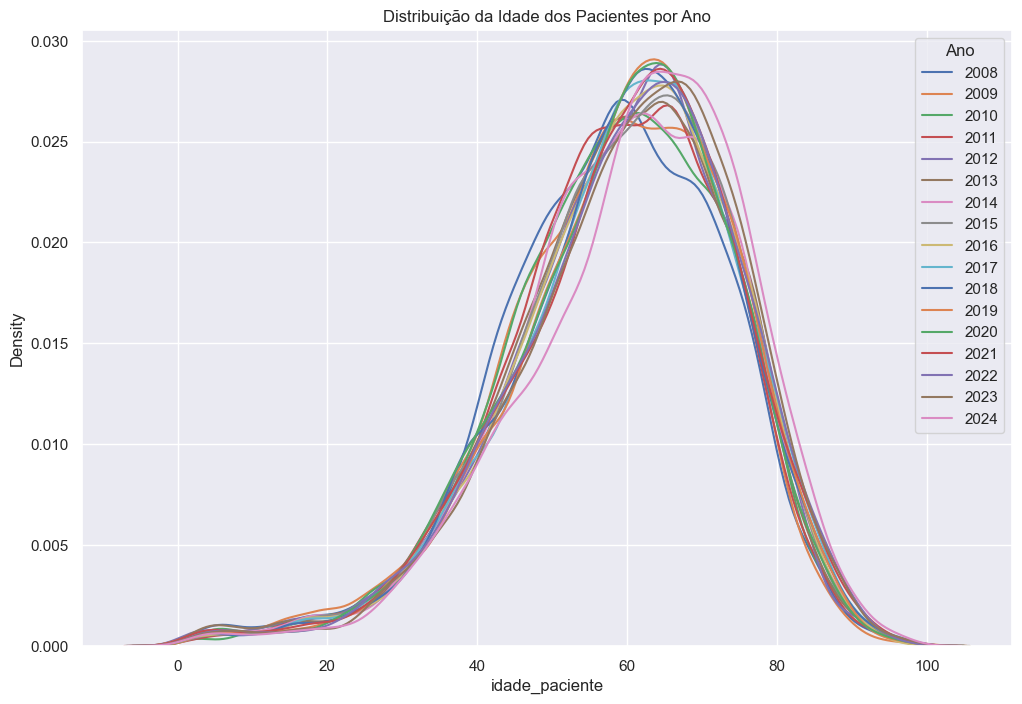

In [63]:
aux = dados_pr_rt9[['idade_paciente', 'ano']]
aux = aux[aux['idade_paciente'] >= 0].copy()

for ano in aux['ano'].unique():
    sns.kdeplot(data=aux[aux['ano'] == ano], x='idade_paciente')

plt.legend(title='Ano', labels=aux['ano'].unique())
plt.title('Distribuição da Idade dos Pacientes por Ano');

## 2.2 Men vs Women year by year since 2020

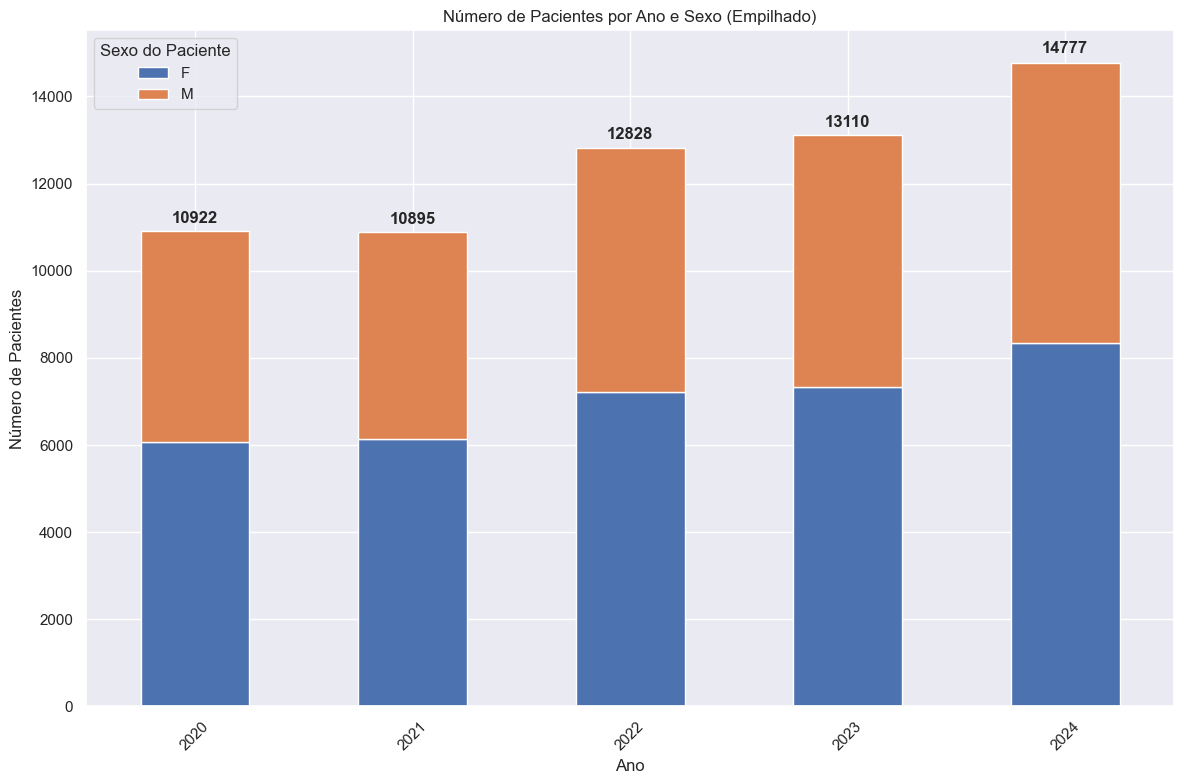

In [64]:
# Create data for stacked bar chart - count of patients by year and gender
aux = dados_pr_rt9.groupby(['ano', 'sexo_paciente']).size().reset_index(name='count')
aux = aux[aux['ano'] > 2019] # This graph is generate before 2019 because we had a uniform APAC for each patient, before this the same patient has about 3 APACs for each treatment

# Pivot the data to have gender as columns for stacking
aux_pivot = aux.pivot(index='ano', columns='sexo_paciente', values='count').fillna(0)

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
ax = aux_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')

plt.title('Número de Pacientes por Ano e Sexo (Empilhado)')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.legend(title='Sexo do Paciente')
plt.xticks(rotation=45)

# Add value labels on top of bars (total)
for i, (idx, row) in enumerate(aux_pivot.iterrows()):
    total = row.sum()
    ax.text(i, total + total * 0.01, f'{int(total)}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 2.3 Total patient's per race

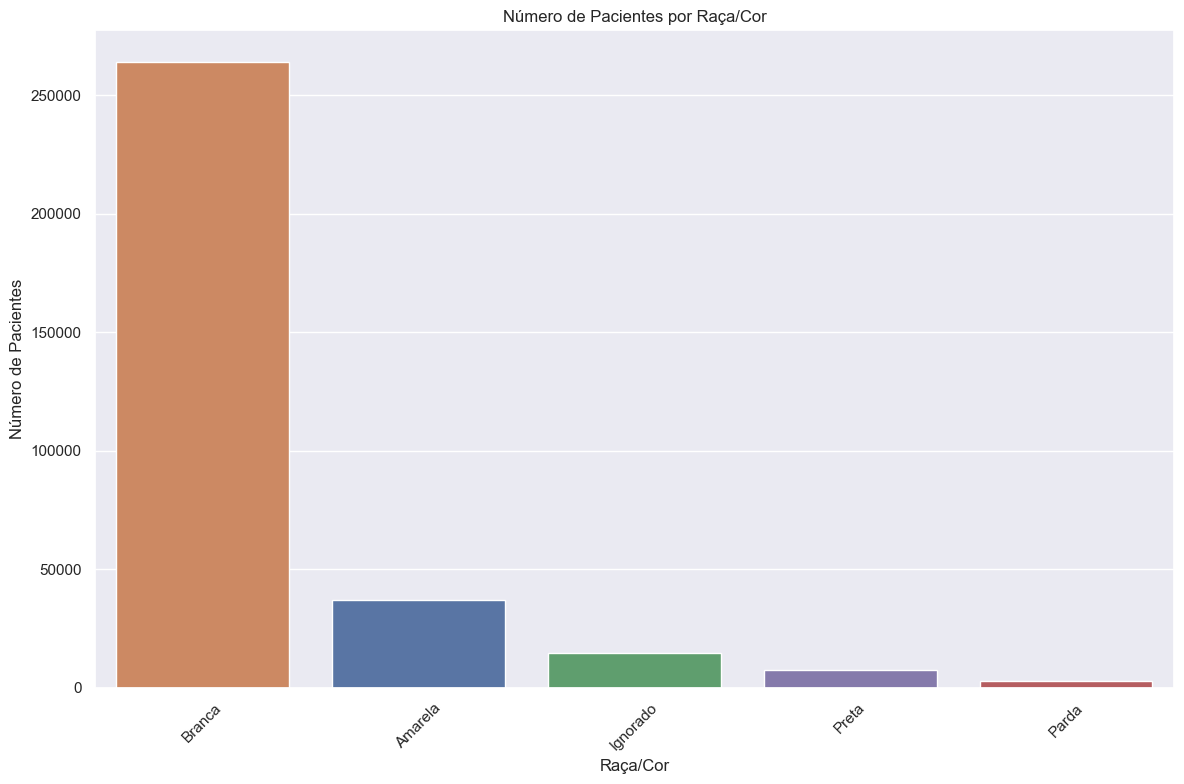

In [65]:
# Create data for stacked bar chart - count of patients by year and race
aux = dados_pr_rt9[['ano', 'raca_cor_paciente']].groupby(['raca_cor_paciente']).count().reset_index()
aux = aux[aux['ano'] > 2019] # This graph is generate before 2019 because we had a uniformed APAC for each patient, before this the same patient has about 3 APACs for each treatment

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=aux, x='raca_cor_paciente', y='ano', hue='raca_cor_paciente', order=aux.sort_values('ano', ascending=False)['raca_cor_paciente'])

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')

plt.title('Número de Pacientes por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)

# Add value labels on top of bars (total)
# for i, (idx, row) in enumerate(aux_pivot.iterrows()):
    # total = row.sum()
    # ax.text(i, total + total * 0.01, f'{int(total)}', 
            # ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 2.4 Cities with biggest revenue in 2024

C:\Users\175 MX\AppData\Local\Temp\ipykernel_30100\1350550246.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


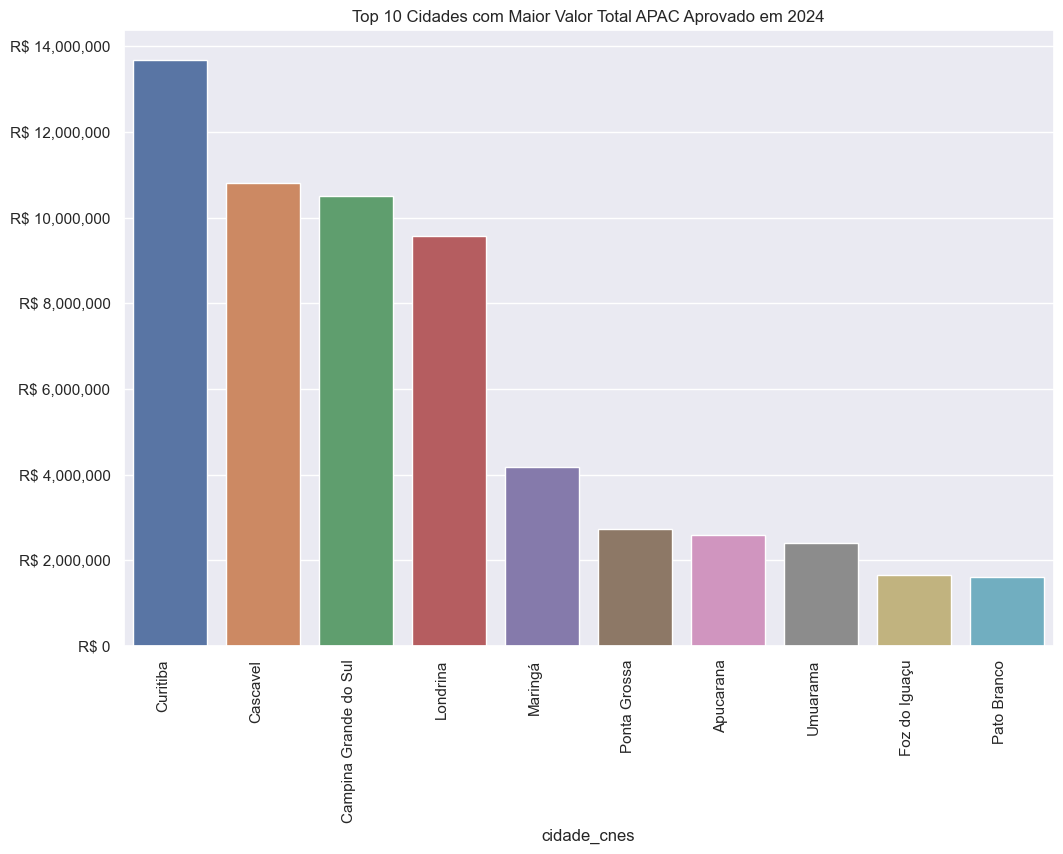

In [66]:
aux = dados_pr_rt9[['cidade_cnes', 'ano', 'valor_total_apac_aprovado']]
aux = aux[aux['ano'] == 2024]

top_10_cities = aux.groupby('cidade_cnes')['valor_total_apac_aprovado'].sum().nlargest(10)

ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, hue=top_10_cities.index)

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')
# Alternative: You can also use this for currency formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.title('Top 10 Cidades com Maior Valor Total APAC Aprovado em 2024');

## 2.5 Number of institutions by city in 2024

In [67]:
aux = dados_pr_rt9[['cidade_cnes', 'codigo_cnes', 'ano']]
aux = aux[aux['ano'] == 2024]

aux[['cidade_cnes', 'codigo_cnes']].groupby(['cidade_cnes']).nunique().reset_index().sort_values('codigo_cnes', ascending=False).set_index('cidade_cnes')

,codigo_cnes
cidade_cnes,
Maringá,2
Curitiba,2
Cascavel,2
Campo Mourão,1
Campina Grande do Sul,1
Apucarana,1
Foz do Iguaçu,1
Londrina,1
Pato Branco,1


## H1: The APAC's mean price has been increasing year by year

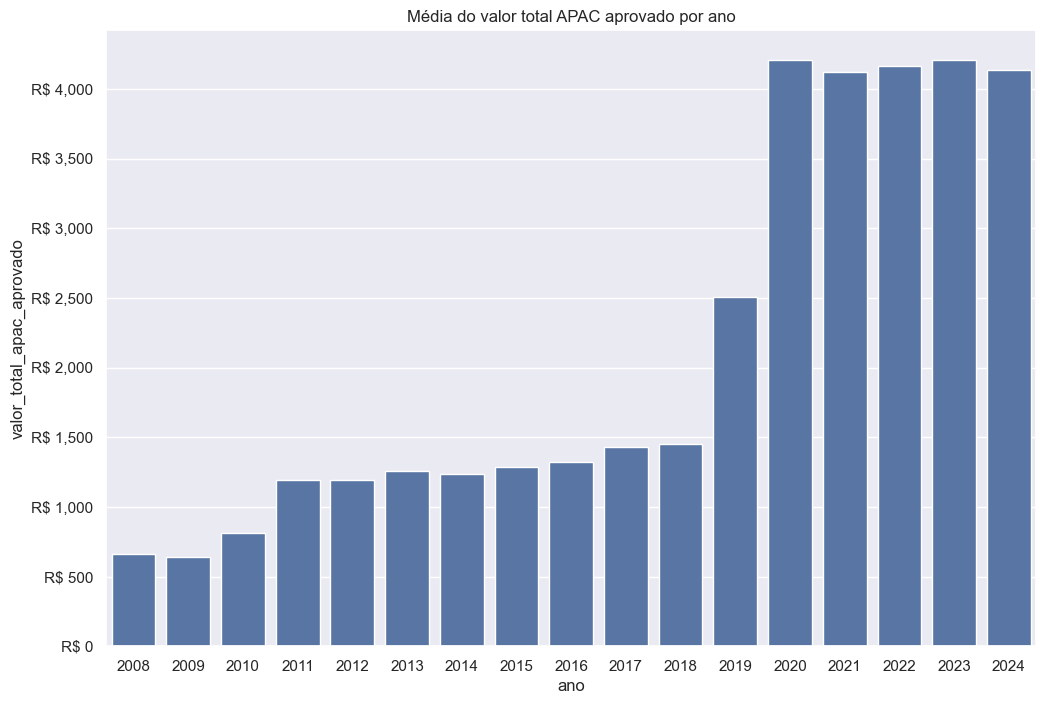

In [68]:
aux = dados_pr_rt9[['valor_total_apac_aprovado', 'ano']] 
aux = aux[aux['valor_total_apac_aprovado'].between(0, 10000)] # Setting this value based on APAC value distribution (we have some outliers below and above those values)
aux = aux.groupby('ano').mean().reset_index().sort_values(by='ano', ascending=True)

ax = sns.barplot(data=aux, x='ano', y='valor_total_apac_aprovado')

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')
# Alternative: You can also use this for currency formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))


plt.title('Média do valor total APAC aprovado por ano');

## H2: The revenue didn't change much, only when we had budget's table updates (not consider SUS Paulista; first graph -> R$; second graph -> US$ using min USD value)

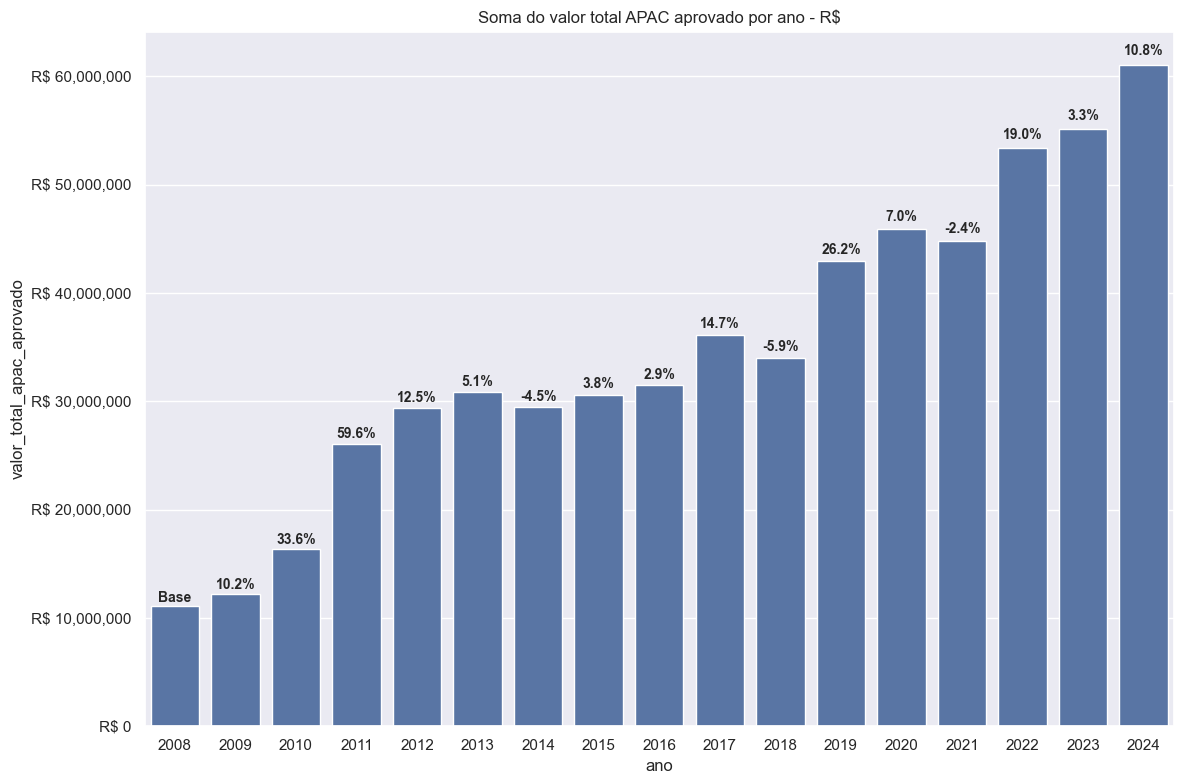

In [69]:
# Groupping and summing data to calculate percentage change by year
aux = dados_pr_rt9[['valor_total_apac_aprovado', 'ano']] 
aux = aux[aux['valor_total_apac_aprovado'].between(0, 10000)] # Setting this value based on APAC value distribution (we have some outliers below and above those values)
aux = aux[['valor_total_apac_aprovado', 'ano']].groupby('ano').sum().reset_index().sort_values(by='ano', ascending=True)
aux['pct_change'] = (aux['valor_total_apac_aprovado'].pct_change() * 100).fillna(0)

# Create the bar plot
ax = sns.barplot(data=aux, x='ano', y='valor_total_apac_aprovado')
plt.title('Soma do valor total APAC aprovado por ano - R$')

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')
# Alternative: You can also use this for currency formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Add percentage change labels above each bar
for i, (index, row) in enumerate(aux.iterrows()):
    # Get the height of the bar
    bar_height = row['valor_total_apac_aprovado']
    
    # Add the percentage change label above the bar
    # Skip the first bar (index 0) since pct_change is 0 for the first year
    if i > 0:
        ax.text(i, bar_height + bar_height * 0.01, f'{row["pct_change"]:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        # For the first bar, you might want to show "Base" or skip the label
        ax.text(i, bar_height + bar_height * 0.01, 'Base', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

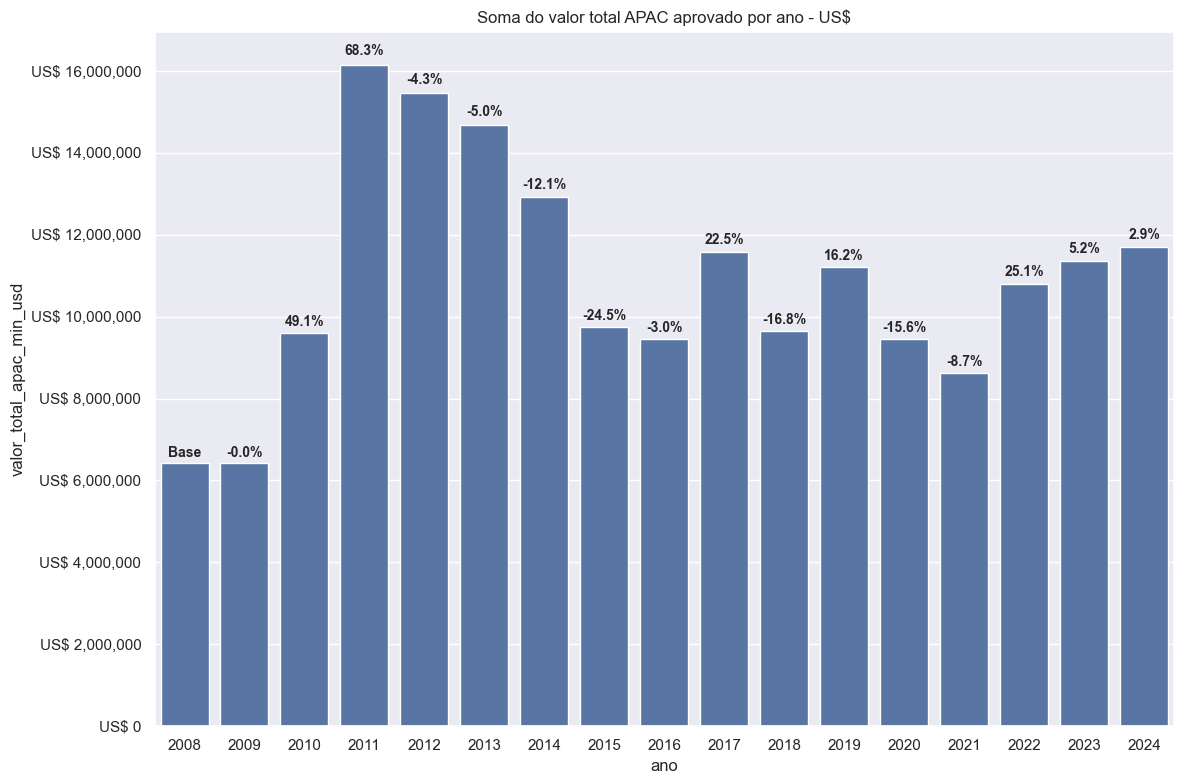

In [70]:
# Groupping and summing data to calculate percentage change by year
aux = dados_pr_rt9[['valor_total_apac_min_usd', 'ano']] 
aux = aux[aux['valor_total_apac_min_usd'].between(0, 10000)] # Setting this value based on APAC value distribution (we have some outliers below and above those values)
aux = aux[['valor_total_apac_min_usd', 'ano']].groupby('ano').sum().reset_index().sort_values(by='ano', ascending=True)
aux['pct_change'] = (aux['valor_total_apac_min_usd'].pct_change() * 100).fillna(0)

# Create the bar plot
ax = sns.barplot(data=aux, x='ano', y='valor_total_apac_min_usd')
plt.title('Soma do valor total APAC aprovado por ano - US$')

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')
# Alternative: You can also use this for currency formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'US$ {x:,.0f}'))

# Add percentage change labels above each bar
for i, (index, row) in enumerate(aux.iterrows()):
    # Get the height of the bar
    bar_height = row['valor_total_apac_min_usd']
    
    # Add the percentage change label above the bar
    # Skip the first bar (index 0) since pct_change is 0 for the first year
    if i > 0:
        ax.text(i, bar_height + bar_height * 0.01, f'{row["pct_change"]:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        # For the first bar, you might want to show "Base" or skip the label
        ax.text(i, bar_height + bar_height * 0.01, 'Base', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

## H3: The mean revenue by institution has increase (first graph -> R$; second graph -> US$ using min USD value)

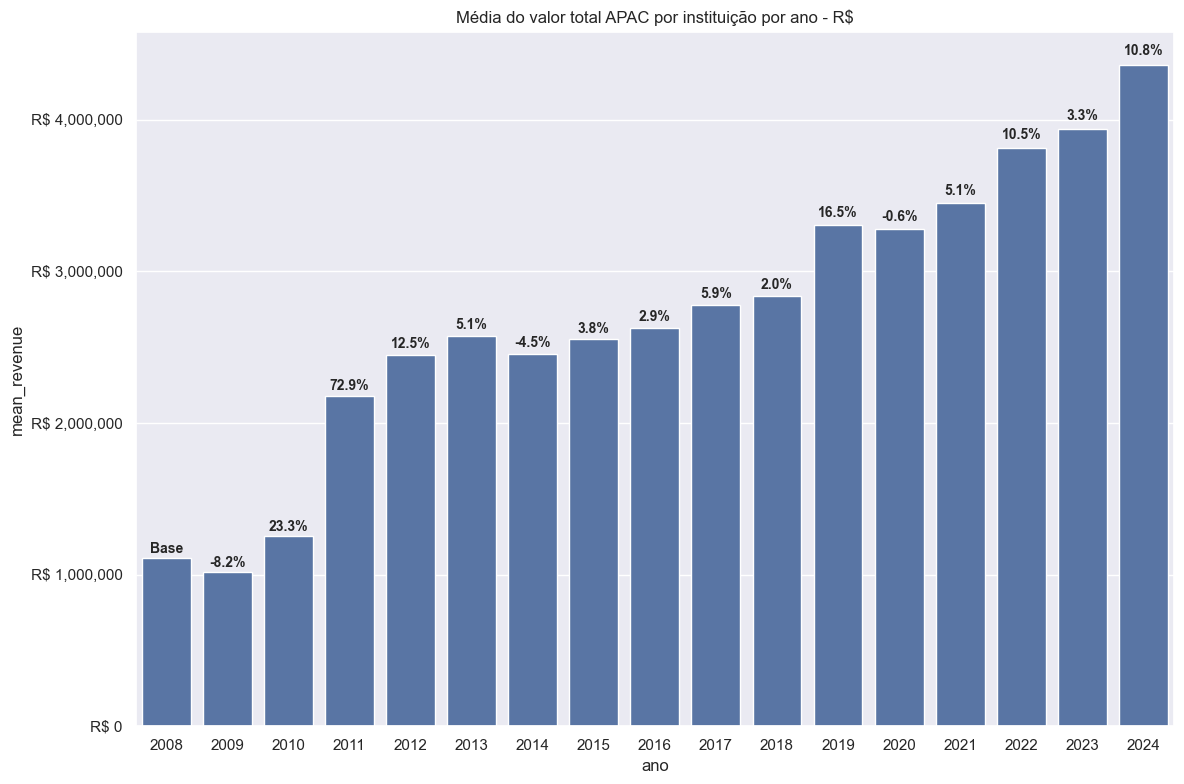

In [71]:
# Groupping and summing data to calculate percentage change by year and the mean revenue by institution
aux = dados_pr_rt9[['valor_total_apac_aprovado', 'ano']] 
aux = aux[aux['valor_total_apac_aprovado'].between(0, 10000)] # Setting this value based on APAC value distribution (we have some outliers below and above those values)
aux = aux[['valor_total_apac_aprovado', 'ano']].groupby('ano').sum().reset_index().sort_values(by='ano', ascending=True)
aux['n_cnes'] = dados_pr_rt9[['ano', 'codigo_cnes']].groupby('ano').nunique().reset_index()['codigo_cnes']
aux['mean_revenue'] = aux['valor_total_apac_aprovado'] / aux['n_cnes']
aux['pct_change'] = (aux['mean_revenue'].pct_change() * 100).fillna(0)

# Create the bar plot
ax = sns.barplot(data=aux, x='ano', y='mean_revenue')
plt.title('Média do valor total APAC por instituição por ano - R$')

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')
# Alternative: You can also use this for currency formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Add percentage change labels above each bar
for i, (index, row) in enumerate(aux.iterrows()):
    # Get the height of the bar
    bar_height = row['mean_revenue']
    
    # Add the percentage change label above the bar
    # Skip the first bar (index 0) since pct_change is 0 for the first year
    if i > 0:
        ax.text(i, bar_height + bar_height * 0.01, f'{row["pct_change"]:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        # For the first bar, you might want to show "Base" or skip the label
        ax.text(i, bar_height + bar_height * 0.01, 'Base', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

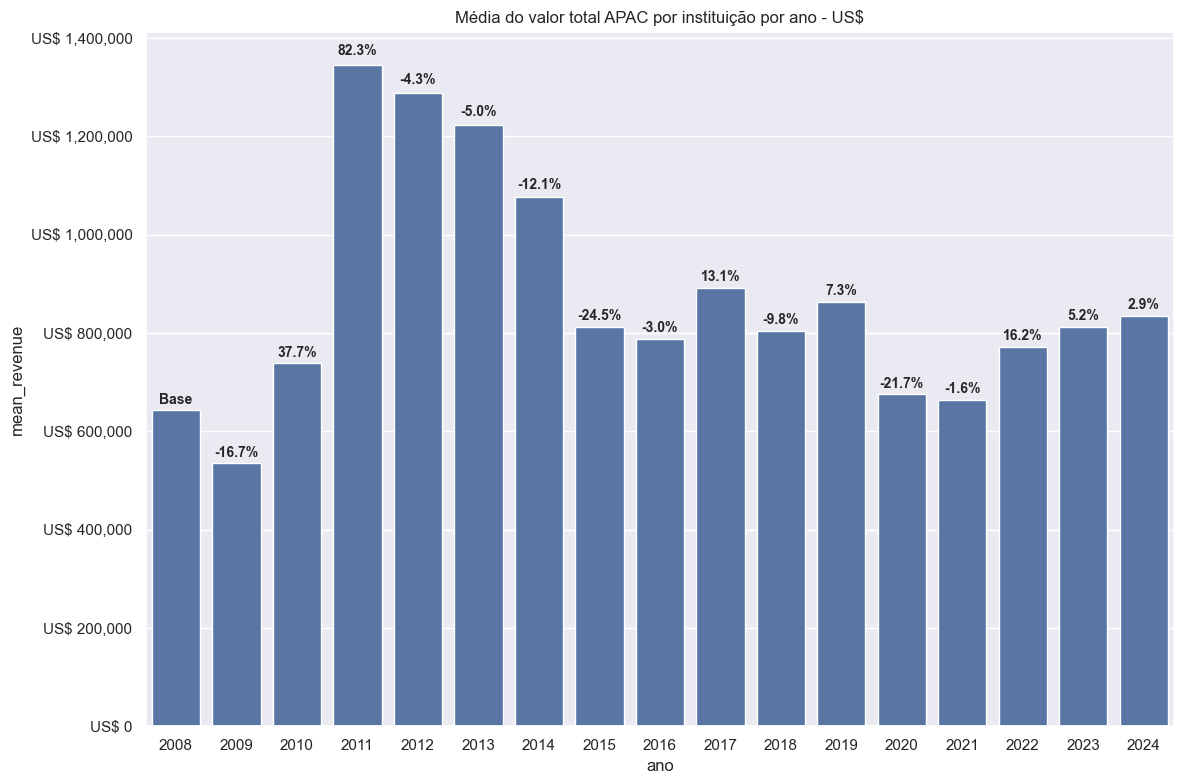

In [72]:
# Groupping and summing data to calculate percentage change by year and the mean revenue by institution
aux = dados_pr_rt9[['valor_total_apac_min_usd', 'ano']] 
aux = aux[aux['valor_total_apac_min_usd'].between(0, 10000)] # Setting this value based on APAC value distribution (we have some outliers below and above those values)
aux = aux[['valor_total_apac_min_usd', 'ano']].groupby('ano').sum().reset_index().sort_values(by='ano', ascending=True)
aux['n_cnes'] = dados_pr_rt9[['ano', 'codigo_cnes']].groupby('ano').nunique().reset_index()['codigo_cnes']
aux['mean_revenue'] = aux['valor_total_apac_min_usd'] / aux['n_cnes']
aux['pct_change'] = (aux['mean_revenue'].pct_change() * 100).fillna(0)

# Create the bar plot
ax = sns.barplot(data=aux, x='ano', y='mean_revenue')
plt.title('Média do valor total APAC por instituição por ano - US$')

# Format y-axis to show complete numbers without scientific notation
ax.ticklabel_format(style='plain', axis='y')
# Alternative: You can also use this for currency formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'US$ {x:,.0f}'))

# Add percentage change labels above each bar
for i, (index, row) in enumerate(aux.iterrows()):
    # Get the height of the bar
    bar_height = row['mean_revenue']
    
    # Add the percentage change label above the bar
    # Skip the first bar (index 0) since pct_change is 0 for the first year
    if i > 0:
        ax.text(i, bar_height + bar_height * 0.01, f'{row["pct_change"]:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        # For the first bar, you might want to show "Base" or skip the label
        ax.text(i, bar_height + bar_height * 0.01, 'Base', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()